# Preprocessing: Cleaning and Normilization 

In [269]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('../data/feature_engineered_dataset.csv')

# Summary statistics
print(df.describe())

       education_level  education_institution  education_field_of_study  \
count      8800.000000            8800.000000               8800.000000   
mean          1.481136               1.859205                  1.967045   
std           0.894279               1.303677                  1.140661   
min           0.000000               0.000000                  0.000000   
25%           1.000000               1.000000                  1.000000   
50%           1.000000               2.000000                  2.000000   
75%           2.000000               3.000000                  3.000000   
max           3.000000               4.000000                  3.000000   

       education_international_experience  \
count                         8800.000000   
mean                             0.196477   
std                              0.397356   
min                              0.000000   
25%                              0.000000   
50%                              0.000000   
75%      

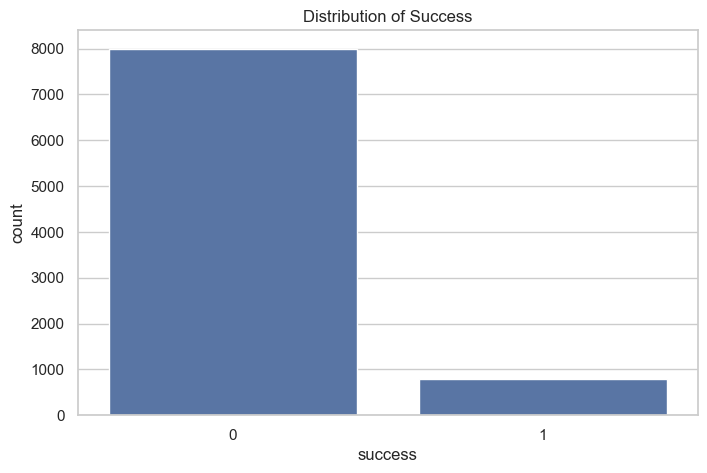

In [270]:
# Plot distribution of success
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="success")
plt.title("Distribution of Success")
plt.show()

In [271]:
# Check if any null values are present in the DataFrame
null_values = df.isnull().sum()

# Display the columns with null values and their counts
print("Columns with missing values:")
print(null_values[null_values > 0])

Columns with missing values:
founder_experience         101
acquisition_experience     101
acquirer_bigtech           101
ipo_experience             101
yoe                       2353
dtype: int64


In [272]:

# Basic dataset overview
print("Dataset Dimensions:", df.shape)
print("\nColumns:", list(df.columns))
print("\nSuccess Rate:", (df['success'] == 1).mean())


Dataset Dimensions: (8800, 69)

Columns: ['founder_uuid', 'name', 'org_name', 'education_level', 'education_institution', 'education_field_of_study', 'education_international_experience', 'education_publications_and_research', 'education_extracurricular_involvement', 'education_awards_and_honors', 'number_of_roles', 'number_of_companies', 'industry_achievements', 'big_company_experience', 'nasdaq_company_experience', 'big_tech_experience', 'google_experience', 'facebook_meta_experience', 'microsoft_experience', 'amazon_experience', 'apple_experience', 'big_tech_position', 'career_growth', 'moving_around', 'international_work_experience', 'worked_at_military', 'worked_at_consultancy', 'worked_at_bank', 'patents_inventions', 'technical_skills', 'technical_publications', 'technical_leadership_roles', 'big_leadership', 'nasdaq_leadership', 'bigtech_leadership', 'number_of_leadership_roles', 'being_lead_of_nonprofits', 'startup_experience', 'previous_startup_funding_experience_as_ceo', 'pre

In [273]:
import numpy as np
import pandas as pd

def clean_dataset(df):
    """
    Clean the dataset by handling missing and invalid values
    """
    cleaned_df = df.copy()
    
    # Boolean mapping
    boolean_map = {
        'FALSE': 0,
        'TRUE': 1,
        'nope': 0,
        'unit': 1,
        'multi': 2,
    }
    

    for column in cleaned_df.columns:
        cleaned_df[column] = cleaned_df[column].map(boolean_map).fillna(cleaned_df[column]).infer_objects(copy=False)

        try:
            cleaned_df[column] = pd.to_numeric(cleaned_df[column], errors='coerce')                
            cleaned_df[column] = cleaned_df[column].fillna(cleaned_df[column].mean())
        
        except Exception:
            # For truly non-numeric columns, fill with most frequent value
            cleaned_df[column] = cleaned_df[column].fillna(cleaned_df[column].mode()[0])
    
    return cleaned_df


cleaned_df = clean_dataset(df)

/var/folders/0n/cj0_5bt12fvgm3kv2bndt3cc0000gn/T/ipykernel_88372/206038766.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_df[column] = cleaned_df[column].map(boolean_map).fillna(cleaned_df[column]).infer_objects(copy=False)


In [274]:
# Check if any null values are present in the DataFrame
null_values = cleaned_df.isnull().sum()

# Display the columns with null values and their counts
print("Columns with missing values:")
print(null_values[null_values > 0])

Columns with missing values:
founder_uuid    8800
name            8800
org_name        8800
persona         8800
dtype: int64


In [275]:
# Drop the columns
columns_to_drop = ['founder_uuid', 'name', 'org_name', 'persona', 'founder_experience', 'acquisition_experience']
cleaned_df = cleaned_df.drop(columns=columns_to_drop)

from sklearn.preprocessing import StandardScaler

# Z-Score Scaling
standard_scaler = StandardScaler()
cleaned_df['yoe'] = standard_scaler.fit_transform(cleaned_df[['yoe']])
print(cleaned_df.head())


   education_level  education_institution  education_field_of_study  \
0              1.0                    3.0                       3.0   
1              3.0                    4.0                       3.0   
2              3.0                    1.0                       3.0   
3              3.0                    4.0                       3.0   
4              3.0                    3.0                       3.0   

   education_international_experience  education_publications_and_research  \
0                                 0.0                                  0.0   
1                                 1.0                                  1.0   
2                                 0.0                                  1.0   
3                                 1.0                                  1.0   
4                                 1.0                                  1.0   

   education_extracurricular_involvement  education_awards_and_honors  \
0                              

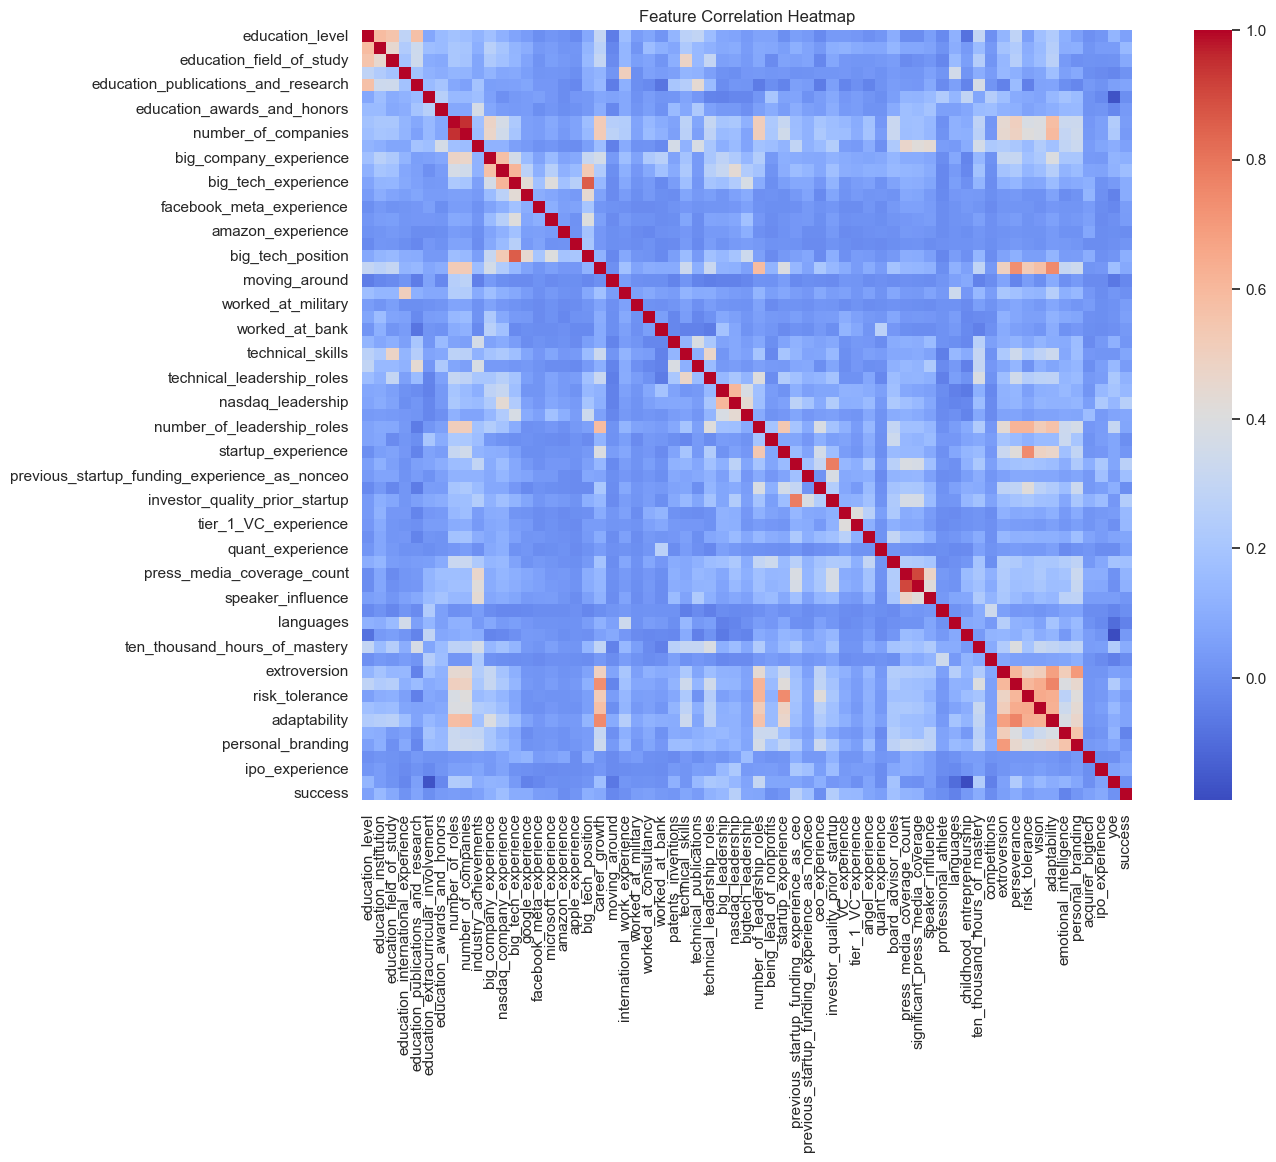

In [276]:
# Compute the correlation matrix
correlation_matrix = cleaned_df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

Note that this is slighly disappointing as there does not appear to be much correlation between features, except those that are trivially related (e.g. number of roles vs. number of leadership roles).

In [277]:
cleaned_df.to_csv('../data/cleaned_dataset.csv', index=False)